<a href="https://colab.research.google.com/github/akim1337/business-cases/blob/main/%D0%9D%D0%B5%D1%87%D0%B0%D0%B9%D0%BA%D0%B8%D0%BD_%D0%90_%D0%92_%C2%AB%D0%91%D0%B0%D0%BD%D0%B4%D0%B8%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D0%A1%D1%8B%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%B4%C2%BB_%D0%BE%D1%82_Garage_Eight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вводные
**Бизнес-цель:**

Статистически значимо снизить количество краж в районах города

**Вопросы и задание:**

Проведите разведочный анализ данных. Сделайте основные выводы про полноту датасета.

Нужно ли увеличить количество полицейских, чтобы снизить количество краж? Поясни свой ответ.

**Данные:**

*   Date: Дата.
*   District: Район города.
*   Warehouse_Name: Название склада.
*   Number_of_Guards: Количество охраны на складе.
*   Police_Units: Количество полицейских на район.
*   Percent_of_Crime_Solved: Процент раскрытых преступлений по уничтожению фонарей в районе.
*   Number_of_Lights: Количество фонарей в районе.

**План исходя из задачи:**

Влияют ли полицейские на кол-во краж?

Приведет ли увеличение полицейских к уменьшению краж?

Есть ли другие факторы, влияющие на кол-во краж?

https://docs.google.com/spreadsheets/d/1JkevCnJrPzzVnhC4FMRunBVWs_g5q9mqMYxKXnXPogI/edit#gid=541310374

https://docs.google.com/spreadsheets/d/12ENNpZ18t2-aBX2nAIjYSwV3hOeaW6Sjdcysy4IeqTc/edit#gid=1248140744



# Результаты


**Проведите разведочный анализ данных. Сделайте основные выводы про полноту датасета.**

*   Не хватает самого главного - количества краж, что сильно сказывается на понимании датасета и интерпретации происходящего в нем.
*   Данные по проценту раскрытых преступлений по уничтожению фонарей в районе распределены по категориям (склад и район города) нормально, без перекосов в какую-либо сторону. Особенно интересно это на значениях меньше 40%, что говорит нам о том, что склады и районы никак не связаны с раскрытием хулиганства.


**Нужно ли увеличить количество полицейских, чтобы снизить количество краж? Поясни свой ответ.**

*   В целом, ответ однозначно на этот вопрос дать невозможно. Тот датасет, что есть на руках, говорит лишь о том, что с увеличением количества фонарей, увеличивается раскрываемость преступлений хулиганства. Но эти же данные коррелируют с датой;
*   Можно сказать, что полицейские научились раскрывать преступления за два года, и это никак не связано с фонарями;
*   Если взять за допущение, что раскрываемость хулиганства коррелирует с уменьшением краж, то очевидно, что на это влияет кол-во фонарей, и в гораздо меньшей степени другие параметры - кол-во охраны и полицейских;
*   Подводя итоги, можно сказать, что увеличение количества полицейских минимально скажется на снижении краж.

**Ответ на бизнес-цель:**

Если мы предполагаем логику, что раскрытие хулиганств с фонарями предотвращает последующую кражу, т.к. позволяет предотвратить это преступление, то очевидно, что необходимо увеличивать кол-во фонарей, а также обучать полицейских раскрывать преступления.

## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fp = pd.read_csv('https://docs.google.com/spreadsheets/d/1JkevCnJrPzzVnhC4FMRunBVWs_g5q9mqMYxKXnXPogI/export?format=csv')
sp = pd.read_csv('https://docs.google.com/spreadsheets/d/12ENNpZ18t2-aBX2nAIjYSwV3hOeaW6Sjdcysy4IeqTc/export?format=csv')

In [ ]:
fp.head()

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units
0,2024-01-26,Мышеостровский,Колбасовы,7,6
1,2024-01-26,Мышеостровский,Молочковы,10,9
2,2024-01-26,Мышеостровский,Мятновы,8,8
3,2024-01-26,Мышеостровский,Сметанинковы,8,7
4,2024-01-26,Краснокотейский,Колбасовы,7,6


In [ ]:
df = fp.merge(sp, on=['Date', 'District', 'Warehouse_Name'], how='left')

In [ ]:
df.sample(5)

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units,Percent_of_Crime_Solved,Number_of_Lights
4793,2023-07-11,Приморский,Молочковы,10,8,48.884210,530
3752,2023-08-23,Мышесельский,Колбасовы,9,9,70.091541,546
6187,2023-05-14,Приморский,Сметанинковы,7,6,66.946893,624
5419,2023-06-15,Приморский,Сметанинковы,1,1,68.616864,743
14867,2022-05-17,Мышесельский,Сметанинковы,8,7,71.432744,955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 17279
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     17280 non-null  object 
 1   District                 17280 non-null  object 
 2   Warehouse_Name           17280 non-null  object 
 3   Number_of_Guards         17280 non-null  int64  
 4   Police_Units             17280 non-null  int64  
 5   Percent_of_Crime_Solved  17280 non-null  float64
 6   Number_of_Lights         17280 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17280 entries, 0 to 17279
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     17280 non-null  datetime64[ns]
 1   District                 17280 non-null  object        
 2   Warehouse_Name           17280 non-null  object        
 3   Number_of_Guards         17280 non-null  int64         
 4   Police_Units             17280 non-null  int64         
 5   Percent_of_Crime_Solved  17280 non-null  float64       
 6   Number_of_Lights         17280 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
max_date = df['Date'].max()
min_date = df['Date'].min()

In [ ]:
max_date

Timestamp('2024-01-26 00:00:00')

In [ ]:
min_date

Timestamp('2022-02-06 00:00:00')

<Axes: >

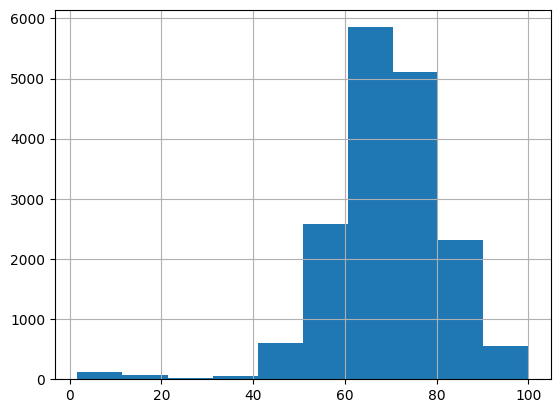

In [ ]:
# Видим, что есть какое-то количестве низкораскрываемых преступлений
df['Percent_of_Crime_Solved'].hist()

In [ ]:
# Ниже 40 процентов всего 255 событий
df[df['Percent_of_Crime_Solved'] < 40].count()

Date                       255
District                   255
Warehouse_Name             255
Number_of_Guards           255
Police_Units               255
Percent_of_Crime_Solved    255
Number_of_Lights           255
dtype: int64

In [ ]:
# Данные в целом распределены по районам и складам равномерно, независимо от того, сколько там фонарей, полицейских и охраны. Смотреть строго вертикаль, т.к. я доказываю равномерность именно между складами в разных метриках
df['Percent_of_Crime_Solved_Range'] = pd.cut(df['Percent_of_Crime_Solved'], bins=[0, 40, 60, 80, 100])
t_pivot = df.pivot_table(index=['District', 'Warehouse_Name'], columns='Percent_of_Crime_Solved_Range', values=['Police_Units', 'Number_of_Guards', 'Number_of_Lights'], aggfunc='count', fill_value=0)
t_pivot

Number_of_Guards                              \
Percent_of_Crime_Solved_Range           (0, 40] (40, 60] (60, 80] (80, 100]   
District        Warehouse_Name                                                
Краснокотейский Колбасовы                    11      124      465       120   
                Молочковы                    12      121      454       133   
                Мятновы                      11      125      465       119   
                Сметанинковы                 10      131      449       130   
Мышеостровский  Колбасовы                    10      119      464       127   
                Молочковы                    10      128      453       129   
                Мятновы                       9      125      465       121   
                Сметанинковы                 10      124      463       123   
Мышесельский    Колбасовы                    12      123      455       130   
                Молочковы                    11      126      455       128   
                Мятновы                      10      113      475       122   
                Сметанинковы                 11      117      469       123   
Невский         Колбасовы                    10      121      467       122   
                Молочковы                     9      126      468       117   
                Мятновы                      11      122      464       123   
                Сметанинковы                 10      122      467       121   
Петрокотский    Колбасовы                    12      112      478       118   
                Молочковы                    11      120      468       121   
                Мятновы                      10      127      460       123   
                Сметанинковы                 10      126      450       134   
Приморский      Колбасовы                    11      132      451       126   
                Молочковы                    11      119      465       125   
                Мятновы                      11      121      464       124   
                Сметанинковы                 12      122      460       126   

                               Number_of_Lights                              \
Percent_of_Crime_Solved_Range           (0, 40] (40, 60] (60, 80] (80, 100]   
District        Warehouse_Name                                                
Краснокотейский Колбасовы                    11      124      465       120   
                Молочковы                    12      121      454       133   
                Мятновы                      11      125      465       119   
                Сметанинковы                 10      131      449       130   
Мышеостровский  Колбасовы                    10      119      464       127   
                Молочковы                    10      128      453       129   
                Мятновы                       9      125      465       121   
                Сметанинковы                 10      124      463       123   
Мышесельский    Колбасовы                    12      123      455       130   
                Молочковы                    11      126      455       128   
                Мятновы                      10      113      475       122   
                Сметанинковы                 11      117      469       123   
Невский         Колбасовы                    10      121      467       122   
                Молочковы                     9      126      468       117   
                Мятновы                      11      122      464       123   
                Сметанинковы                 10      122      467       121   
Петрокотский    Колбасовы                    12      112      478       118   
                Молочковы                    11      120      468       121   
                Мятновы                      10      127      460       123   
                Сметанинковы                 10      126      450       134   
Приморский      Колбасовы                    11      132      451       126   
 

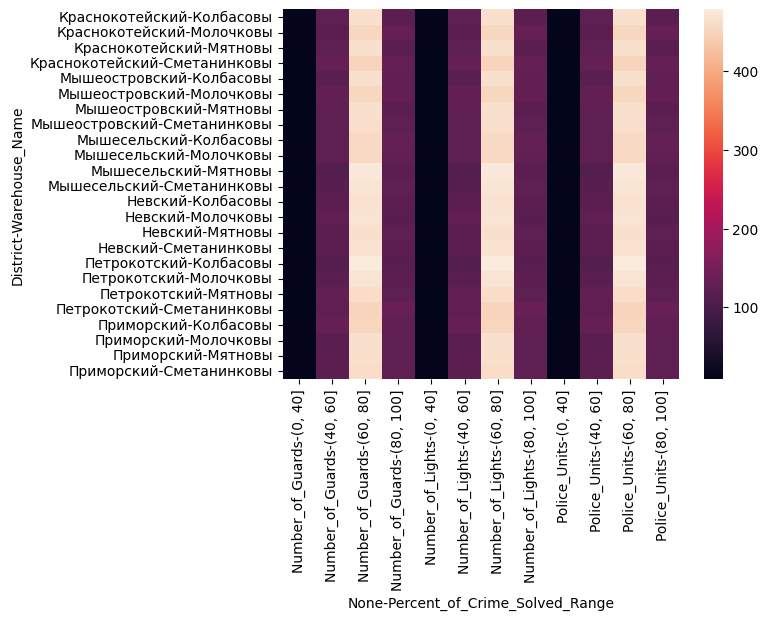

In [ ]:
#Отсутствие выбросов
sns.heatmap(t_pivot, vmin=t_pivot.min().min(), vmax=t_pivot.max().max())
plt.show()

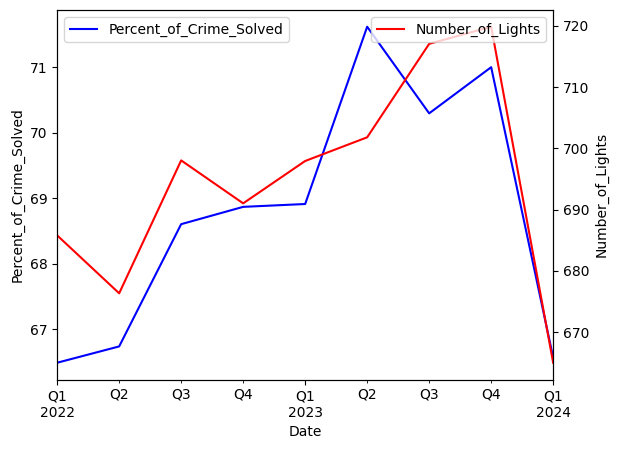

In [ ]:
# Рассмотрим фонари и количество раскрывамых преступлений вместе
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
df.groupby(df['Date'].dt.to_period('Q'))['Percent_of_Crime_Solved'].mean().plot(ax=ax1, color='blue')
df.groupby(df['Date'].dt.to_period('Q'))['Number_of_Lights'].mean().plot(ax=ax2, color='red')
ax1.set_ylabel('Percent_of_Crime_Solved')
ax2.set_ylabel('Number_of_Lights')
ax1.legend(['Percent_of_Crime_Solved'], loc='upper left')
ax2.legend(['Number_of_Lights'], loc='upper right')
plt.show()

Видим эти данные в данамике. Скорее всего эти переменные коррелируют между собой

In [ ]:
# Наблюдаем рост по месяцами только фонарей
pivot_table = df.pivot_table(index=['District', 'Warehouse_Name'], columns=pd.Grouper(key='Date', freq='9M'), values=['Police_Units', 'Number_of_Guards', 'Number_of_Lights'], aggfunc='mean')
rounded_pivot_table = pivot_table.round()
rounded_pivot_table

Number_of_Guards                        \
Date                                 2022-02-28 2022-11-30 2023-08-31   
District        Warehouse_Name                                          
Краснокотейский Колбасовы                   5.0        6.0        6.0   
                Молочковы                   6.0        6.0        6.0   
                Мятновы                     6.0        6.0        6.0   
                Сметанинковы                7.0        6.0        6.0   
Мышеостровский  Колбасовы                   7.0        6.0        6.0   
                Молочковы                   6.0        6.0        6.0   
                Мятновы                     5.0        6.0        6.0   
                Сметанинковы                6.0        6.0        6.0   
Мышесельский    Колбасовы                   6.0        6.0        6.0   
                Молочковы                   4.0        6.0        6.0   
                Мятновы                     6.0        6.0        6.0   
                Сметанинковы                7.0        6.0        6.0   
Невский         Колбасовы                   6.0        6.0        6.0   
                Молочковы                   6.0        6.0        6.0   
                Мятновы                     6.0        6.0        6.0   
                Сметанинковы                7.0        6.0        6.0   
Петрокотский    Колбасовы                   7.0        6.0        6.0   
                Молочковы                   6.0        6.0        6.0   
                Мятновы                     6.0        6.0        6.0   
                Сметанинковы                6.0        6.0        6.0   
Приморский      Колбасовы                   6.0        6.0        6.0   
                Молочковы                   6.0        6.0        6.0   
                Мятновы                     5.0        6.0        6.0   
                Сметанинковы                6.0        6.0        6.0   

                                          Number_of_Lights             \
Date                           2024-05-31       2022-02-28 2022-11-30   
District        Warehouse_Name                                          
Краснокотейский Колбасовы             6.0            673.0      691.0   
                Молочковы             6.0            726.0      689.0   
                Мятновы               6.0            674.0      707.0   
                Сметанинковы          6.0            654.0      698.0   
Мышеостровский  Колбасовы             6.0            681.0      693.0   
                Молочковы             6.0            654.0      695.0   
                Мятновы               6.0            648.0      703.0   
                Сметанинковы          6.0            610.0      693.0   
Мышесельский    Колбасовы             6.0            654.0      695.0   
                Молочковы             6.0            622.0      678.0   
                Мятновы               6.0            675.0      690.0   
                Сметанинковы          6.0            652.0      692.0   
Невский         Колбасовы             6.0            698.0      692.0   
                Молочковы             6.0            668.0      673.0   
                Мятновы               6.0            600.0      701.0   
                Сметанинковы          6.0            658.0      683.0   
Петрокотский    Колбасовы             6.0            642.0      702.0   
                Молочковы             6.0            626.0      693.0   
                Мятновы               6.0            626.0      695.0   
                Сметанинковы          6.0            680.0      692.0   
Приморский      Колбасовы             6.0            683.0      695.0   
                Молочковы             6.0            689.0      676.0   
                Мятновы               6.0            660.0      683.0   
                Сметанинковы          6.0            634.0      683.0   

                                                     Police_Units             \
Date   

По ЕДА становится понятно, что за два года в среднем кол-во охранников и полицейских не увеличилось, но увеличилось кол-во фонарей. Также увеличилась раскрываемость преступлений.

Отсюда в принципе понятно, что увеличение кол-ва полицейских и охранников, никак не повлияет на кражи.

Но совершенно нет информации, насколько увеличились кражи, и увеличились ли.

Разберемся, что сильнее всего влияет на раскрываемость хулиганства

## Регрессионный анализ



In [ ]:
! pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [ ]:
len(train) / len(df)

0.6

In [ ]:
len(test) / len(df)

0.4

In [ ]:
train.columns

Index(['Date', 'District', 'Warehouse_Name', 'Number_of_Guards',
       'Police_Units', 'Percent_of_Crime_Solved', 'Number_of_Lights',
       'Percent_of_Crime_Solved_Range'],
      dtype='object')

In [ ]:
train.sample(3)

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units,Percent_of_Crime_Solved,Number_of_Lights,Percent_of_Crime_Solved_Range
11949,2022-09-16,Невский,Молочковы,4,3,64.386893,746,"(60, 80]"
6819,2023-04-17,Мышеостровский,Сметанинковы,1,1,58.112843,662,"(40, 60]"
15514,2022-04-20,Мышесельский,Мятновы,5,3,62.682691,399,"(60, 80]"


In [ ]:
X = ['Date','Number_of_Guards', 'Police_Units', 'Number_of_Lights', 'District', 'Warehouse_Name']

cat_features = ['District', 'Warehouse_Name']

y = ['Percent_of_Crime_Solved']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.5,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train[X],train[y])

0:	learn: 0.2815894	total: 46.4ms	remaining: 46.3s
100:	learn: 0.1751569	total: 2.34s	remaining: 20.8s
200:	learn: 0.1551175	total: 4.67s	remaining: 18.6s
300:	learn: 0.1425566	total: 6.72s	remaining: 15.6s
400:	learn: 0.1288980	total: 8.6s	remaining: 12.8s
500:	learn: 0.1219342	total: 11.9s	remaining: 11.9s
600:	learn: 0.1153816	total: 14.6s	remaining: 9.71s
700:	learn: 0.1107886	total: 15.9s	remaining: 6.8s
800:	learn: 0.1036600	total: 16.7s	remaining: 4.15s
900:	learn: 0.0988803	total: 17.4s	remaining: 1.91s
999:	learn: 0.0957756	total: 18.1s	remaining: 0us


In [ ]:
test['crime_solve_pred'] = model.predict(test[X])

In [ ]:
error(test['Percent_of_Crime_Solved'],test['crime_solve_pred'])

6.794315914921726
0.1718746212430096


In [ ]:
test.sample(3)

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units,Percent_of_Crime_Solved,Number_of_Lights,Percent_of_Crime_Solved_Range,crime_solve_pred
2218,2023-10-26,Мышесельский,Мятновы,7,5,65.668852,759,"(60, 80]",74.229629
10307,2022-11-23,Мышесельский,Сметанинковы,3,2,67.753197,712,"(60, 80]",68.827950
656,2023-12-30,Мышесельский,Колбасовы,4,3,85.360271,729,"(80, 100]",72.940270


In [ ]:
# Влияние признаков на процент раскрываемости
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Date,56.510292
1,Number_of_Lights,28.213577
2,Number_of_Guards,5.512158
3,Police_Units,5.166126
4,District,2.702360
5,Warehouse_Name,1.895487


Тут очевидно, что самое большое влияние оказывает дата на раскрывамость преступлений. Можно было бы сделать предположение, что со временем, действительно определенные органы научились раскрывать преступления. В большей части, но также им в этом помогает и увеличение кол-ва фонарей.  

In [ ]:
# Проведем эксперимент, и увеличим кол-во фонарей на 30%, и оценим, насколько средняя раскрываемость увеличиться по обученной модели
test_up_Number_of_Lights = test.copy()
test_up_Number_of_Lights['Number_of_Lights'] = (test_up_Number_of_Lights['Number_of_Lights'] * 1.3).astype(int)

In [ ]:
test_up_Number_of_Lights['crime_solve_pred_new'] = model.predict(test_up_Number_of_Lights[X])

In [ ]:
test_up_Number_of_Lights['crime_solve_pred_new'].mean()

73.70218896459521

In [ ]:
df['Percent_of_Crime_Solved'].mean()

69.11126842819885

В среднем, с увеличением кол-ва фонарей на 30%, можно прогнозировать увеличение раскрываемости преступлений на 5%

In [ ]:
df[df['Date'] == '2024-01-26 00:00:00']['Number_of_Lights'].sum()

20271

### Регрессия без даты - эксперимент


In [ ]:
test1 = test.copy()
train1 = train.copy()

In [ ]:
X = ['Number_of_Guards', 'Police_Units', 'Number_of_Lights', 'District', 'Warehouse_Name']

cat_features = ['District', 'Warehouse_Name']

y = ['Percent_of_Crime_Solved']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.5,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train1[X],train1[y])

0:	learn: 0.2819666	total: 26.3ms	remaining: 26.3s
100:	learn: 0.2601927	total: 1.85s	remaining: 16.5s
200:	learn: 0.2481261	total: 3.38s	remaining: 13.4s
300:	learn: 0.2381480	total: 4.04s	remaining: 9.38s
400:	learn: 0.2311882	total: 4.68s	remaining: 6.99s
500:	learn: 0.2243927	total: 5.34s	remaining: 5.32s
600:	learn: 0.2178498	total: 6.02s	remaining: 3.99s
700:	learn: 0.2124072	total: 6.66s	remaining: 2.84s
800:	learn: 0.2072548	total: 7.32s	remaining: 1.82s
900:	learn: 0.2014853	total: 8.01s	remaining: 880ms
999:	learn: 0.1968653	total: 8.72s	remaining: 0us


In [ ]:
test1['crime_solve_pred'] = model.predict(test1[X])

In [ ]:
error(test1['Percent_of_Crime_Solved'],test1['crime_solve_pred'])

8.109213792948301
0.2382561968854218


In [ ]:
test1.sample(3)

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units,Percent_of_Crime_Solved,Number_of_Lights,Percent_of_Crime_Solved_Range,crime_solve_pred
10199,2022-11-28,Невский,Сметанинковы,4,2,70.274284,862,"(60, 80]",65.371147
41,2024-01-25,Приморский,Молочковы,9,9,76.774562,821,"(60, 80]",72.196732
12097,2022-09-09,Мышеостровский,Молочковы,10,9,75.217710,787,"(60, 80]",65.150646


In [ ]:
# Влияние признаков на процент раскрываемости. Можем видеть, что без дат более значимое влияние оказывают разные признаки, но количество фонарей все равно в значимом большинстве
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Number_of_Lights,48.020293
1,Number_of_Guards,15.596437
2,Police_Units,14.020232
3,District,11.873625
4,Warehouse_Name,10.489412


### Регрессия без фонарей - эксперимент

In [ ]:
test2 = test.copy()
train2 = train.copy()

In [ ]:
X = ['Date', 'Number_of_Guards', 'Police_Units', 'District', 'Warehouse_Name']

cat_features = ['District', 'Warehouse_Name']

y = ['Percent_of_Crime_Solved']

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.5,
              'random_seed':42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train2[X],train2[y])

0:	learn: 0.2914791	total: 42.6ms	remaining: 42.6s
100:	learn: 0.2143988	total: 1.85s	remaining: 16.4s
200:	learn: 0.1977152	total: 2.93s	remaining: 11.6s
300:	learn: 0.1876610	total: 3.58s	remaining: 8.31s
400:	learn: 0.1792968	total: 4.27s	remaining: 6.38s
500:	learn: 0.1725554	total: 5.01s	remaining: 4.99s
600:	learn: 0.1677053	total: 5.67s	remaining: 3.77s
700:	learn: 0.1628143	total: 6.31s	remaining: 2.69s
800:	learn: 0.1558803	total: 6.96s	remaining: 1.73s
900:	learn: 0.1525412	total: 7.62s	remaining: 837ms
999:	learn: 0.1473910	total: 8.79s	remaining: 0us


In [ ]:
test2['crime_solve_pred'] = model.predict(test2[X])

In [ ]:
error(test2['Percent_of_Crime_Solved'],test2['crime_solve_pred'])

8.123576080597068
0.1993897617297337


In [ ]:
test2.sample(3)

,Date,District,Warehouse_Name,Number_of_Guards,Police_Units,Percent_of_Crime_Solved,Number_of_Lights,Percent_of_Crime_Solved_Range,crime_solve_pred
6909,2023-04-14,Невский,Молочковы,2,1,84.315444,1207,"(80, 100]",71.273802
3608,2023-08-29,Мышесельский,Колбасовы,6,6,73.382743,712,"(60, 80]",69.737514
1121,2023-12-11,Приморский,Молочковы,4,2,51.673993,438,"(40, 60]",74.340513


In [ ]:
# Очевидно, что все же остальные параметры малозначимо влияют на Percent_of_Crime_Solved
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Date,74.220149
1,Number_of_Guards,8.004287
2,Police_Units,7.766390
3,District,5.107766
4,Warehouse_Name,4.901408
